In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
# Assuming the data is in a CSV file named 'nse_tataglobal.csv'
df = pd.read_csv('NSE-TATAGLOBAL.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataframe by date
df = df.sort_values('Date')

In [2]:
# Create features
df['PreviousClose'] = df['Close'].shift(1)
df['PreviousVolume'] = df['Total Trade Quantity'].shift(1)
df['PriceChange'] = df['Close'] - df['Open']
df['HighLowDiff'] = df['High'] - df['Low']

# Drop the first row which will have NaN values due to shifting
df = df.dropna()


In [3]:
# Prepare features and target
features = ['PreviousClose', 'PreviousVolume', 'PriceChange', 'HighLowDiff']
X = df[features]
y = df['Close']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=5.0)  # Adjust alpha as needed to control regularization strength
ridge_model.fit(X_train, y_train)


Ridge(alpha=100.0)

In [11]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean squared error: {mse:.2f}")
print(f"R-squared score: {r2:.2f}")


Mean squared error: 1.79
R-squared score: 1.00


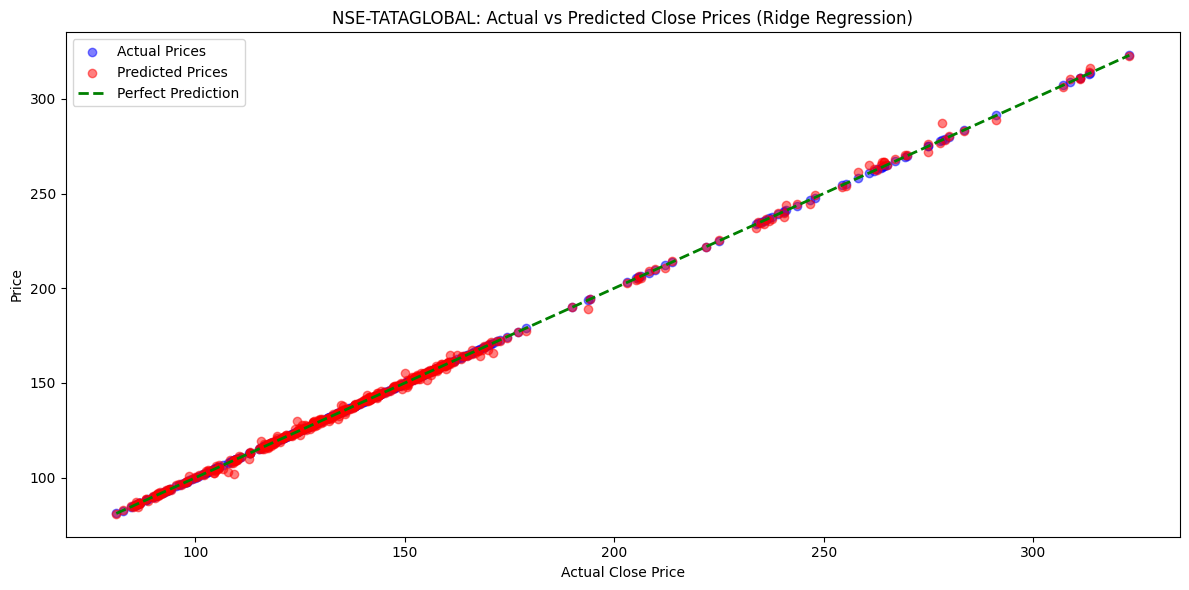

In [12]:

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Prices')
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5, label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Close Price')
plt.ylabel('Price')
plt.title('NSE-TATAGLOBAL: Actual vs Predicted Close Prices (Ridge Regression)')
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Print feature importances (coefficients in Ridge regression)
importance = pd.DataFrame({'feature': features, 'importance': ridge_model.coef_})
print("\nFeature Importances:")
print(importance.sort_values('importance', ascending=False))



Feature Importances:
          feature    importance
0   PreviousClose  1.001956e+00
2     PriceChange  9.262981e-01
1  PreviousVolume  4.990664e-08
3     HighLowDiff -9.713573e-02


In [8]:
# Predict the next day's closing price
last_day = df.iloc[-1]
next_day_features = np.array([[
    last_day['Close'],
    last_day['Total Trade Quantity'],
    last_day['Close'] - last_day['Open'],
    last_day['High'] - last_day['Low']
]])


In [9]:
next_day_prediction = ridge_model.predict(next_day_features)
print(f"\nPredicted closing price for next trading day: {next_day_prediction[0]:.2f}")



Predicted closing price for next trading day: 233.87


C:\Users\HP\miniforge3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
